In [17]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# Keras Sequential

In [3]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
dataX = np.stack([x*x, x]).T

$$y = 2x^2 + 3x + 5$$

In [7]:
model = Sequential()
model.add(Dense(1, input_dim=2)) # Bias는 자동으로 설정
model.compile(loss='mse',
             optimizer=optimizers.Adam(lr=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=300, verbose=0)
print('fit complete')

fit complete


In [8]:
h.params

{'verbose': 0, 'epochs': 300, 'steps': 10}

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Real Model (coef)
$y = 2x^2 + 3x + 5$

### Hypothesis Model (coef)
$y = 2.0000005x^2+3.0000002x+4.999994$

In [15]:
parameters = model.layers[0].get_weights()
parameters

[array([[2.0000005],
        [3.0000002]], dtype=float32),
 array([4.999994], dtype=float32)]

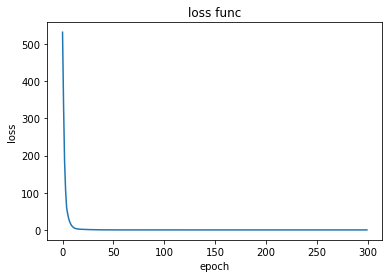

In [21]:
plt.plot(h.history['loss'])
plt.title('loss func')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Keras Functional

In [23]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

xInput = Input(batch_shape=(None, dataX.shape[1])) # None = 몇 개가 들어올지 모름
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer=optimizers.Adam(lr=0.01))

h = model.fit(dataX, y, batch_size=10, epochs=300, verbose=0)
print('Fit complete')

Fit complete


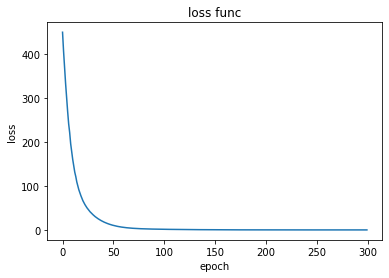

In [24]:
plt.plot(h.history['loss'])
plt.title('loss func')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [28]:
model.layers[0].get_weights()

[]